In [2]:
import json
import os
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_style('darkgrid')

In [4]:
root_dir = Path.cwd().parent
data_dir = os.path.join(root_dir, "playwright/axeResults")

In [19]:
with open(os.path.join(data_dir, '00-summary.json'), 'r') as summary_file:
    # print(summary_file.read())
    text = summary_file.read()
    summary = json.loads(text)

In [36]:
summary_compiled = []
for listing in summary:
    compiled = {
        'Title': listing['title'],
        'Total Violations': listing['violationCount'],
        "Minor": 0,
        "Moderate": 0,
        "Serious": 0,
        "Critical": 0
    }
    for violation in listing['violations']:
        if violation['impact'] == 'minor':
            compiled['Minor'] += 1
        if violation['impact'] == 'moderate':
            compiled['Moderate'] += 1
        if violation['impact'] == 'serious':
            compiled['Serious'] += 1
        if violation['impact'] == 'critical':
            compiled['Critical'] += 1
    summary_compiled.append(compiled)

In [37]:
summary_df = pd.DataFrame(summary_compiled)

In [38]:
sorted = summary_df.sort_values('Total Violations')

In [40]:
sorted

,Title,Total Violations,Minor,Moderate,Serious,Critical
27,Transact | Overview,1,1,0,0,0
0,iGrad,2,1,0,1,0
21,Public Knowledge - Using the MyPassword Service,2,0,0,1,1
10,Enrollment Verification Request · Angelo State...,2,1,1,0,0
28,View Addresses and Phones,3,0,3,0,0
9,Emergency Loan Application,3,0,3,0,0
17,Login - Enter Username,3,2,1,0,0
16,Login - Enter Password,3,2,1,0,0
26,Sign in to your account,3,2,1,0,0
3,Aid Year,3,0,3,0,0


/tmp/ipykernel_2984439/1395541700.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


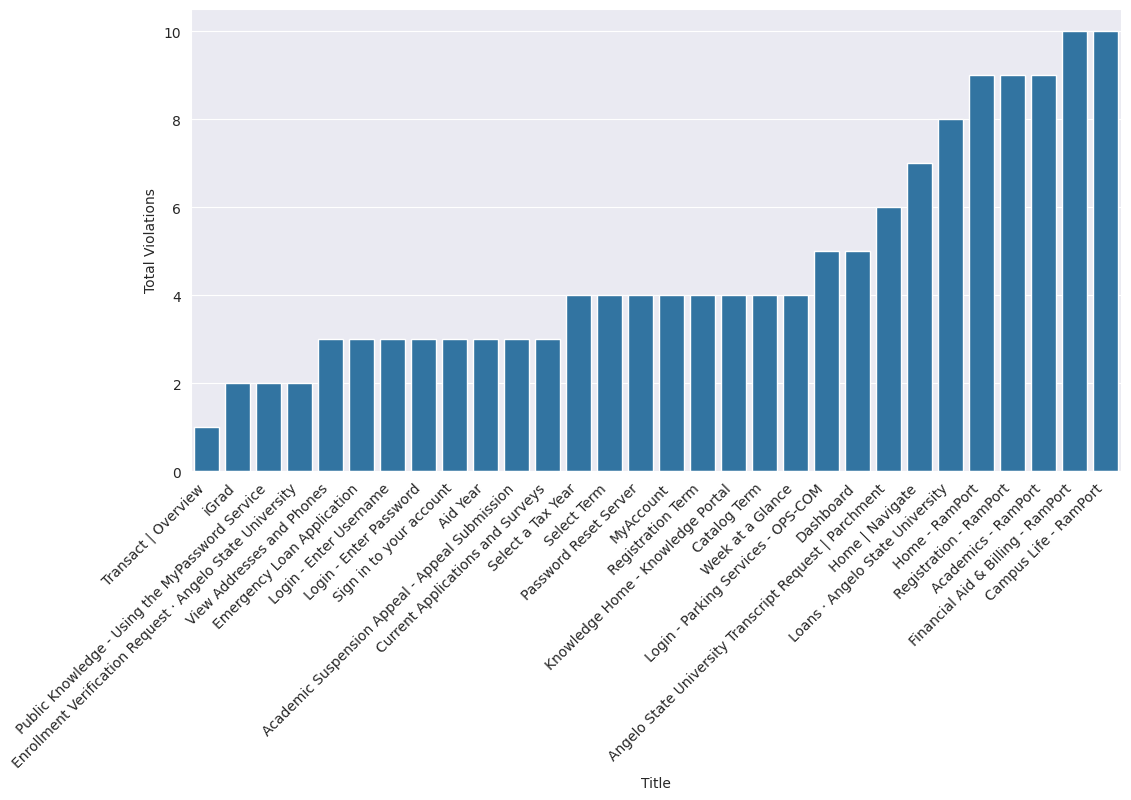

In [39]:
plt.figure(figsize=(12, 6))
chart = sns.barplot(x=sorted['Title'], y=sorted['Total Violations'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
